In [1]:
import numpy as np

def check_intersection(circle1, circle2, angle, max_distance):
    """
    Check if a projectile from circle1 intersects circle2.
    """
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2
    
    # Calculate the end point of the projectile
    x_proj = x1 + max_distance * np.cos(angle)
    y_proj = y1 + max_distance * np.sin(angle)
    
    # Line segment start and end
    start = np.array([x1, y1])
    end = np.array([x_proj, y_proj])
    
    # Circle2 properties
    center = np.array([x2, y2])
    radius = r2
    
    # Check distance from line to circle center
    line_vec = end - start
    start_to_center = center - start
    proj_length = np.dot(start_to_center, line_vec) / np.linalg.norm(line_vec)
    closest_point = start + proj_length * line_vec / np.linalg.norm(line_vec)
    dist_to_center = np.linalg.norm(closest_point - center)
    
    # Check if within circle
    return dist_to_center <= radius and np.linalg.norm(center - start) <= max_distance

def compute_intersection_percentages(circles, angles, max_distance):
    results = []
    for i, circle in enumerate(circles):
        total_intersections = 0
        for angle in angles:
            for j, other_circle in enumerate(circles):
                if i != j:  # Don't compare the circle to itself
                    if check_intersection(circle, other_circle, angle, max_distance):
                        total_intersections += 1
                        break  # Stop checking after the first intersection
        percentage = total_intersections / len(angles) * 100
        results.append(percentage)
    return results

# Example usage
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Example circles
angles = np.linspace(0, 2 * np.pi, 360)  # 360 degrees
max_distance = 15  # Maximum projectile distance

percentages = compute_intersection_percentages(circles, angles, max_distance)
print("Intersection percentages for each circle:", percentages)

Intersection percentages for each circle: [62.77777777777778, 62.77777777777778, 58.88888888888889]


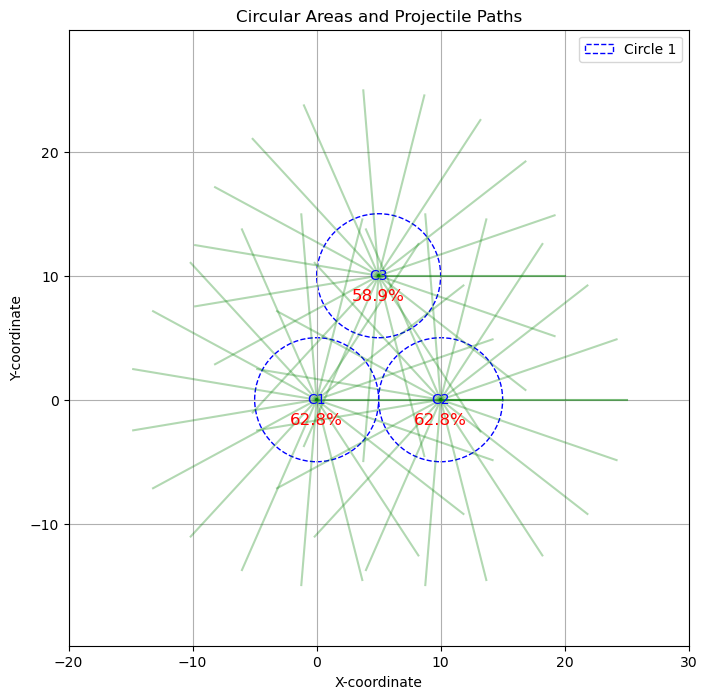

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def check_intersection(circle1, circle2, angle, max_distance):
    """
    Check if a projectile from circle1 intersects circle2.
    """
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2
    
    # Calculate the end point of the projectile
    x_proj = x1 + max_distance * np.cos(angle)
    y_proj = y1 + max_distance * np.sin(angle)
    
    # Line segment start and end
    start = np.array([x1, y1])
    end = np.array([x_proj, y_proj])
    
    # Circle2 properties
    center = np.array([x2, y2])
    radius = r2
    
    # Check distance from line to circle center
    line_vec = end - start
    start_to_center = center - start
    proj_length = np.dot(start_to_center, line_vec) / np.linalg.norm(line_vec)
    closest_point = start + proj_length * line_vec / np.linalg.norm(line_vec)
    dist_to_center = np.linalg.norm(closest_point - center)
    
    # Check if within circle
    return dist_to_center <= radius and np.linalg.norm(center - start) <= max_distance

def compute_intersection_percentages(circles, angles, max_distance):
    results = []
    for i, circle in enumerate(circles):
        total_intersections = 0
        for angle in angles:
            for j, other_circle in enumerate(circles):
                if i != j:  # Don't compare the circle to itself
                    if check_intersection(circle, other_circle, angle, max_distance):
                        total_intersections += 1
                        break  # Stop checking after the first intersection
        percentage = total_intersections / len(angles) * 100
        results.append(percentage)
    return results

def plot_circles_and_projectiles(circles, angles, max_distance, results):
    """
    Visualize the circular areas and some projectile paths.
    """
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot circles
    for i, (x, y, radius) in enumerate(circles):
        circle = plt.Circle((x, y), radius, color='blue', fill=False, linestyle='--', label=f'Circle {i+1}' if i == 0 else None)
        ax.add_artist(circle)
        ax.text(x, y, f'C{i+1}', ha='center', va='center', fontsize=10, color='blue')

    # Plot projectiles
    for i, (x, y, _) in enumerate(circles):
        num_projectiles = 20  # Limit the number of projectiles for visualization
        selected_angles = np.linspace(0, 2 * np.pi, num_projectiles)
        for angle in selected_angles:
            x_proj = x + max_distance * np.cos(angle)
            y_proj = y + max_distance * np.sin(angle)
            ax.plot([x, x_proj], [y, y_proj], color='green', alpha=0.3)

    # Add percentage labels
    for i, (x, y, _) in enumerate(circles):
        ax.text(x, y - 2, f'{results[i]:.1f}%', ha='center', fontsize=12, color='red')

    # Format the plot
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-max_distance - 5, max_distance + 15)
    ax.set_ylim(-max_distance - 5, max_distance + 15)
    ax.set_title("Circular Areas and Projectile Paths")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    ax.legend()
    plt.grid(True)
    plt.show()

# Example data
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
angles = np.linspace(0, 2 * np.pi, 360)  # 360 degrees
max_distance = 15  # Maximum projectile distance

# Compute percentages
percentages = compute_intersection_percentages(circles, angles, max_distance)

# Visualize the results
plot_circles_and_projectiles(circles, angles, max_distance, percentages)


In [3]:
def compute_boundary_intersection_percentage(circles, num_boundary_points, num_angles, max_distance):
    """
    Compute the percentage of angles from the boundary of a circle that intersect another circle.
    
    Parameters:
        circles: List of tuples representing circles as (x, y, radius).
        num_boundary_points: Number of points to sample on the circle's boundary.
        num_angles: Number of angles to sample for projectiles.
        max_distance: Maximum distance a projectile can travel.
        
    Returns:
        A list of percentages for each circle.
    """
    results = []
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    
    for i, (cx, cy, radius) in enumerate(circles):
        boundary_points = [
            (cx + radius * np.cos(theta), cy + radius * np.sin(theta))
            for theta in np.linspace(0, 2 * np.pi, num_boundary_points, endpoint=False)
        ]
        total_intersections = 0
        total_tests = num_boundary_points * num_angles
        
        for bx, by in boundary_points:
            for angle in angles:
                # Compute the projectile's end point
                x_proj = bx + max_distance * np.cos(angle)
                y_proj = by + max_distance * np.sin(angle)
                
                # Check intersections with other circles
                for j, (ox, oy, oradius) in enumerate(circles):
                    if i != j:  # Exclude the current circle
                        center = np.array([ox, oy])
                        line_start = np.array([bx, by])
                        line_end = np.array([x_proj, y_proj])
                        
                        # Line-circle intersection
                        line_vec = line_end - line_start
                        start_to_center = center - line_start
                        proj_length = np.dot(start_to_center, line_vec) / np.linalg.norm(line_vec)
                        closest_point = line_start + proj_length * line_vec / np.linalg.norm(line_vec)
                        dist_to_center = np.linalg.norm(closest_point - center)
                        
                        if dist_to_center <= oradius and np.linalg.norm(center - line_start) <= max_distance:
                            total_intersections += 1
                            break  # Stop checking other circles for this projectile
        
        percentage = (total_intersections / total_tests) * 100
        results.append(percentage)
    
    return results

# Example usage
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
num_boundary_points = 50  # Points sampled around the boundary
num_angles = 360  # Number of angles for projectiles
max_distance = 15  # Maximum projectile distance

percentages = compute_boundary_intersection_percentage(circles, num_boundary_points, num_angles, max_distance)
print("Boundary-origin intersection percentages:", percentages)


Boundary-origin intersection percentages: [61.32222222222222, 61.32222222222222, 51.19444444444444]


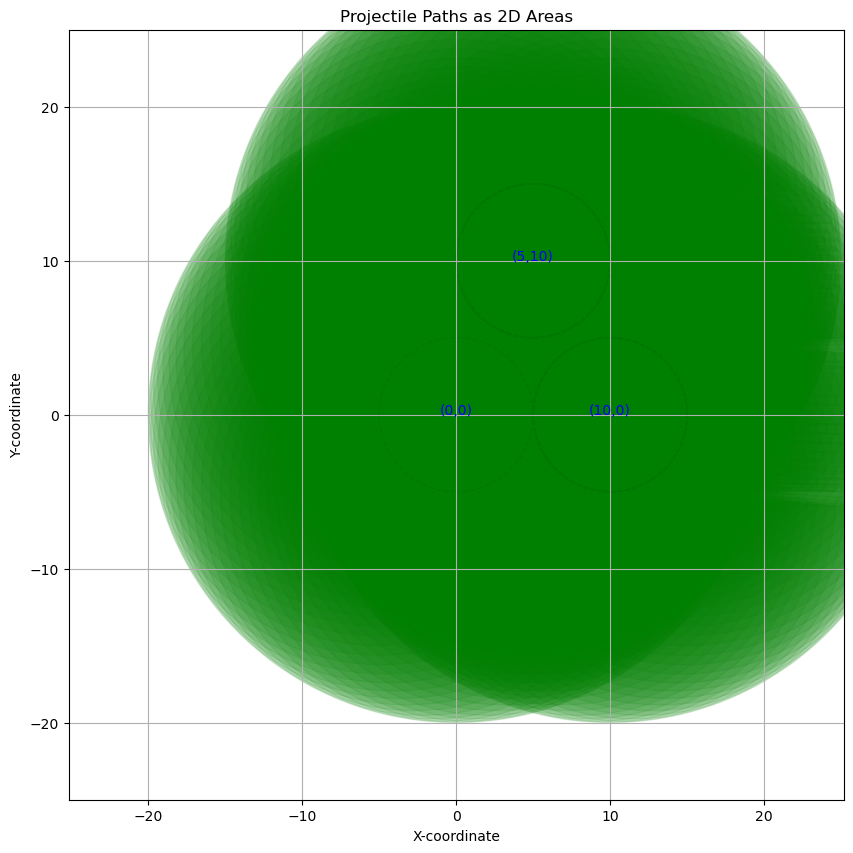

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def projectile_area(origin, radius, max_distance, num_angles=100, resolution=50):
    """
    Compute the cone-like areas of projectiles originating from a circle's boundary.
    
    Parameters:
        origin: (x, y) tuple for the circle's center.
        radius: Radius of the circle.
        max_distance: Maximum distance a projectile can travel.
        num_angles: Number of projectile directions per boundary point.
        resolution: Number of points to sample on the circle's boundary.
        
    Returns:
        List of areas as polygons (list of (x, y) points).
    """
    cx, cy = origin
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    boundary_points = [
        (cx + radius * np.cos(t), cy + radius * np.sin(t))
        for t in np.linspace(0, 2 * np.pi, resolution, endpoint=False)
    ]
    areas = []
    
    for bx, by in boundary_points:
        cone = [(bx, by)]
        for theta in angles:
            x_proj = bx + max_distance * np.cos(theta)
            y_proj = by + max_distance * np.sin(theta)
            cone.append((x_proj, y_proj))
        cone.append((bx, by))  # Close the cone
        areas.append(np.array(cone))
    
    return areas

def visualize_cones(circles, max_distance, num_angles=100, resolution=50):
    """
    Visualize cone-like projectile paths as 2D areas.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    for cx, cy, radius in circles:
        # Draw the circle
        circle = plt.Circle((cx, cy), radius, color='blue', fill=False, linestyle='--')
        ax.add_artist(circle)
        ax.text(cx, cy, f"({cx},{cy})", ha='center', fontsize=10, color='blue')
        
        # Compute and draw projectile cones
        areas = projectile_area((cx, cy), radius, max_distance, num_angles, resolution)
        for area in areas:
            ax.fill(area[:, 0], area[:, 1], color='green', alpha=0.1)
    
    # Plot formatting
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-max_distance - 10, max_distance + 10)
    ax.set_ylim(-max_distance - 10, max_distance + 10)
    ax.set_title("Projectile Paths as 2D Areas")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    plt.grid(True)
    plt.show()

# Example data
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
max_distance = 15  # Maximum projectile distance

visualize_cones(circles, max_distance)

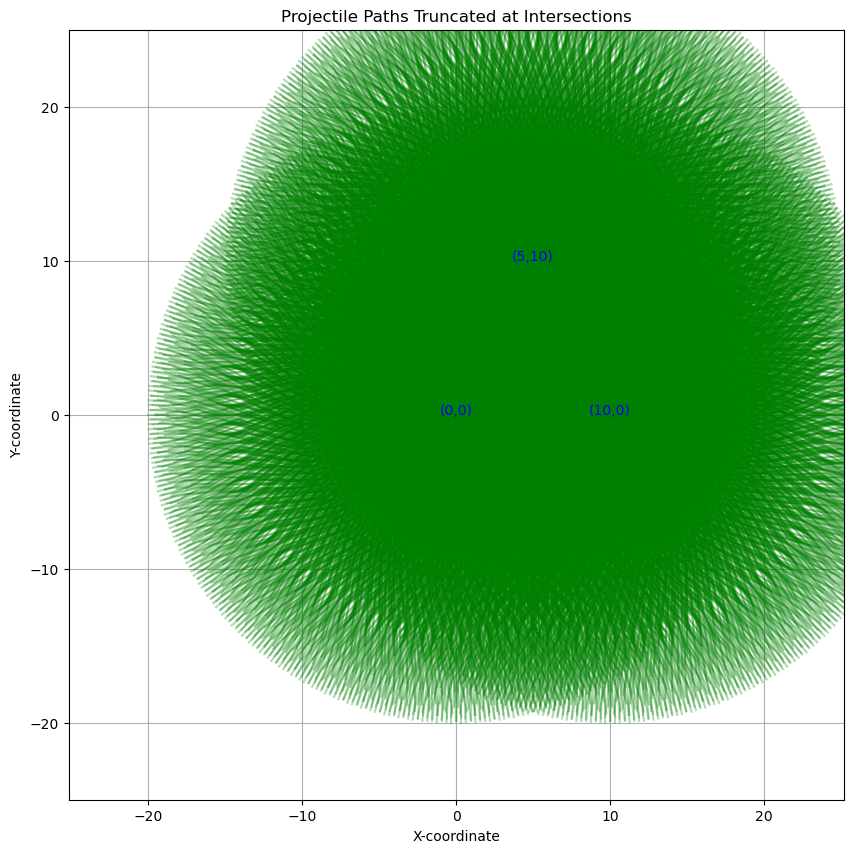

In [6]:
def compute_intersection(origin, direction, circle):
    """
    Compute the intersection point of a line and a circle, if any.
    
    Parameters:
        origin: (x, y) tuple for the starting point of the line.
        direction: (dx, dy) tuple for the direction vector of the line.
        circle: (cx, cy, r) tuple for the circle's center and radius.
        
    Returns:
        The intersection point (x, y) or None if no intersection occurs.
    """
    ox, oy = origin
    dx, dy = direction
    cx, cy, r = circle
    
    # Transform to circle's coordinate space
    ox -= cx
    oy -= cy
    
    # Quadratic coefficients
    a = dx**2 + dy**2
    b = 2 * (ox * dx + oy * dy)
    c = ox**2 + oy**2 - r**2
    
    # Solve quadratic equation
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        return None  # No intersection
    
    # Roots of the quadratic equation
    t1 = (-b - np.sqrt(discriminant)) / (2 * a)
    t2 = (-b + np.sqrt(discriminant)) / (2 * a)
    
    # Filter for positive roots
    positive_roots = [t for t in [t1, t2] if t > 0]
    if not positive_roots:
        return None  # No valid intersection along the direction
    
    # Smallest positive root (nearest intersection)
    t = min(positive_roots)
    
    # Compute intersection point
    ix = ox + t * dx + cx
    iy = oy + t * dy + cy
    return (ix, iy)


def projectile_area_with_intersections(circles, max_distance, num_angles=100, resolution=50):
    """
    Compute truncated projectile paths for visualization.
    """
    areas = []
    for cx, cy, radius in circles:
        boundary_points = [
            (cx + radius * np.cos(t), cy + radius * np.sin(t))
            for t in np.linspace(0, 2 * np.pi, resolution, endpoint=False)
        ]
        
        angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
        for bx, by in boundary_points:
            for theta in angles:
                dx = max_distance * np.cos(theta)
                dy = max_distance * np.sin(theta)
                
                # Truncate path at the first intersection
                intersection = None
                for ocx, ocy, oradius in circles:
                    if (ocx, ocy, oradius) == (cx, cy, radius):
                        continue  # Skip the current circle
                    intersection = compute_intersection((bx, by), (dx, dy), (ocx, ocy, oradius))
                    if intersection:
                        break
                
                # Add truncated path
                if intersection:
                    areas.append([(bx, by), intersection])
                else:
                    areas.append([(bx, by), (bx + dx, by + dy)])
    return areas

def visualize_truncated_cones(circles, max_distance, num_angles=100, resolution=50):
    """
    Visualize truncated projectile paths that stop at intersections.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw circles
    for cx, cy, radius in circles:
        circle = plt.Circle((cx, cy), radius, color='blue', fill=False, linestyle='--')
        ax.add_artist(circle)
        ax.text(cx, cy, f"({cx},{cy})", ha='center', fontsize=10, color='blue')
    
    # Compute and draw truncated paths
    paths = projectile_area_with_intersections(circles, max_distance, num_angles, resolution)
    for path in paths:
        x, y = zip(*path)
        ax.plot(x, y, color='green', alpha=0.3)
    
    # Plot formatting
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-max_distance - 10, max_distance + 10)
    ax.set_ylim(-max_distance - 10, max_distance + 10)
    ax.set_title("Projectile Paths Truncated at Intersections")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    plt.grid(True)
    plt.show()

# Example usage
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
max_distance = 15  # Maximum projectile distance

visualize_truncated_cones(circles, max_distance)


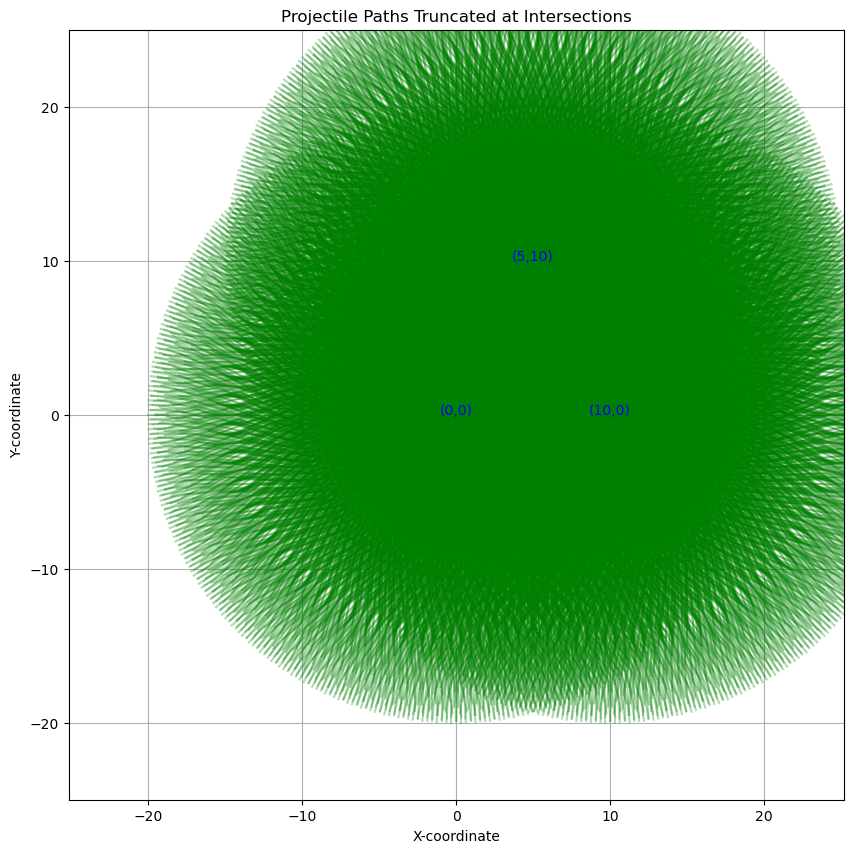

In [8]:
def compute_intersection(origin, direction, circle):
    """
    Compute the intersection point of a line and a circle, if any.
    """
    ox, oy = origin
    dx, dy = direction
    cx, cy, r = circle
    
    # Transform to circle's coordinate space
    ox -= cx
    oy -= cy
    
    # Quadratic coefficients
    a = dx**2 + dy**2
    b = 2 * (ox * dx + oy * dy)
    c = ox**2 + oy**2 - r**2
    
    # Solve quadratic equation
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        return None  # No intersection
    
    # Roots of the quadratic equation
    t1 = (-b - np.sqrt(discriminant)) / (2 * a)
    t2 = (-b + np.sqrt(discriminant)) / (2 * a)
    
    # Filter for positive roots
    positive_roots = [t for t in [t1, t2] if t > 0]
    if not positive_roots:
        return None  # No valid intersection along the direction
    
    # Smallest positive root (nearest intersection)
    t = min(positive_roots)
    
    # Compute intersection point
    ix = ox + t * dx + cx
    iy = oy + t * dy + cy
    return (ix, iy)

def projectile_area_with_intersections(circles, max_distance, num_angles=100, resolution=50):
    """
    Compute truncated projectile paths for visualization.
    """
    paths = []
    for cx, cy, radius in circles:
        boundary_points = [
            (cx + radius * np.cos(t), cy + radius * np.sin(t))
            for t in np.linspace(0, 2 * np.pi, resolution, endpoint=False)
        ]
        
        angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
        for bx, by in boundary_points:
            for theta in angles:
                dx = max_distance * np.cos(theta)
                dy = max_distance * np.sin(theta)
                
                # Truncate path at the first intersection
                path_end = (bx + dx, by + dy)  # Default to full path
                for ocx, ocy, oradius in circles:
                    if (ocx, ocy, oradius) == (cx, cy, radius):
                        continue  # Skip the current circle
                    intersection = compute_intersection((bx, by), (dx, dy), (ocx, ocy, oradius))
                    if intersection:
                        path_end = intersection
                        break  # Stop at the first intersection
                
                # Add truncated path
                paths.append([(bx, by), path_end])
    return paths

def visualize_truncated_cones(circles, max_distance, num_angles=100, resolution=50):
    """
    Visualize truncated projectile paths that stop at intersections.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    

    
    # Compute and draw truncated paths
    paths = projectile_area_with_intersections(circles, max_distance, num_angles, resolution)
    for path in paths:
        x, y = zip(*path)
        ax.plot(x, y, color='green', alpha=0.3)

    # Draw circles
    for cx, cy, radius in circles:
        circle = plt.Circle((cx, cy), radius, color='blue', fill=False, linestyle='--')
        ax.add_artist(circle)
        ax.text(cx, cy, f"({cx},{cy})", ha='center', fontsize=10, color='blue')
    
    # Plot formatting
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-max_distance - 10, max_distance + 10)
    ax.set_ylim(-max_distance - 10, max_distance + 10)
    ax.set_title("Projectile Paths Truncated at Intersections")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    plt.grid(True)
    plt.show()

# Example usage
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
max_distance = 15  # Maximum projectile distance

visualize_truncated_cones(circles, max_distance)


In [41]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Optional

@dataclass
class Circle:
    x: float
    y: float
    radius: float

def calculate_line_circle_intersection(
    start_x: float, 
    start_y: float, 
    angle: float, 
    max_distance: float,
    target_circle: Circle
) -> Optional[float]:
    """
    Calculate if and where a line intersects with a circle.
    Returns the distance to intersection point if exists, None otherwise.
    """
    # Convert angle to radians
    angle_rad = np.radians(angle)
    
    # Calculate direction vector
    dx = np.cos(angle_rad)
    dy = np.sin(angle_rad)
    
    # Vector from line start to circle center
    cx = target_circle.x - start_x
    cy = target_circle.y - start_y
    
    # Solve quadratic equation for intersection
    a = dx * dx + dy * dy
    b = 2 * (dx * cx + dy * cy)
    c = cx * cx + cy * cy - target_circle.radius * target_circle.radius
    
    discriminant = b * b - 4 * a * c
    
    if discriminant < 0:
        return None
    
    # Calculate intersection points
    t1 = (-b + np.sqrt(discriminant)) / (2 * a)
    t2 = (-b - np.sqrt(discriminant)) / (2 * a)
    
    # Get valid intersection point (closest positive value within max_distance)
    valid_distances = [t for t in [t1, t2] if 0 <= t <= max_distance]
    
    return min(valid_distances) if valid_distances else None

def analyze_projectile_coverage(
    circles: List[Circle],
    angle_step: float = 1,
    distance_step: float = 0.1
) -> List[dict]:
    """
    Analyze the percentage of angles and distances that result in intersections
    between each source circle and all target circles.
    
    Args:
        circles: List of Circle objects
        angle_step: Step size for angle sampling (degrees)
        distance_step: Step size for distance sampling
        
    Returns:
        List of dictionaries containing intersection statistics for each source circle
    """
    results = []
    
    for i, source in enumerate(circles):
        circle_stats = {
            'source_circle': i,
            'intersections': []
        }
        
        # Get max possible distance (distance to furthest circle + its radius)
        max_distance = max(
            np.sqrt((c.x - source.x)**2 + (c.y - source.y)**2) + c.radius
            for c in circles if c != source
        )
        
        # Sample angles and distances
        angles = np.arange(0, 360, angle_step)
        distances = np.arange(distance_step, max_distance, distance_step)
        total_combinations = len(angles) * len(distances)
        
        for j, target in enumerate(circles):
            if target == source:
                continue
                
            intersection_count = 0
            
            for angle in angles:
                for distance in distances:
                    intersection_dist = calculate_line_circle_intersection(
                        source.x + source.radius * np.cos(np.radians(angle)),
                        source.y + source.radius * np.sin(np.radians(angle)),
                        angle,
                        distance,
                        target
                    )
                    
                    if intersection_dist is not None:
                        intersection_count += 1
            
            percentage = (intersection_count / total_combinations) * 100
            circle_stats['intersections'].append({
                'target_circle': j,
                'intersection_percentage': percentage
            })
            
        results.append(circle_stats)
    
    return results

# Example usage
if __name__ == "__main__":
    # Create some example circles
    circles = [
        Circle(0, 0, 1),      # Circle at origin with radius 1
        Circle(5, 0, 1.5),    # Circle at (3,0) with radius 1.5
        Circle(1.5, 5, 1),    # Circle at (1.5,2) with radius 1
    ]
    
    # Analyze intersections
    results = analyze_projectile_coverage(circles, angle_step=1, distance_step=0.2)
    
    # Print results
    for circle_stat in results:
        print(f"\nSource Circle {circle_stat['source_circle']}:")
        for intersection in circle_stat['intersections']:
            print(f"  Target Circle {intersection['target_circle']}: "
                  f"{intersection['intersection_percentage']:.2f}% coverage")


Source Circle 0:
  Target Circle 1: 2.66% coverage
  Target Circle 2: 1.03% coverage

Source Circle 1:
  Target Circle 0: 1.30% coverage
  Target Circle 2: 0.21% coverage

Source Circle 2:
  Target Circle 0: 1.83% coverage
  Target Circle 1: 1.90% coverage


Parallel processing failed: A process in the process pool was terminated abruptly while the future was running or pending.. Falling back to sequential processing.

Source Circle 0:

  Target Circle 1:
    Intersection percentage: 0.79%
    Most effective angles (degrees):
      180°: 1.00
      177°: 0.95
      178°: 0.95
      179°: 0.95
      181°: 0.95
    Most common intersection distances:
      9.0 units: 1.00
      10.0 units: 0.21

  Target Circle 2:
    Intersection percentage: 0.93%
    Most effective angles (degrees):
      247°: 1.00
      248°: 1.00
      249°: 1.00
      250°: 1.00
      243°: 0.90
    Most common intersection distances:
      5.0 units: 1.00

Source Circle 1:

  Target Circle 0:
    Intersection percentage: 0.09%
    Most effective angles (degrees):
      0°: 1.00
      1°: 0.80
      2°: 0.80
      358°: 0.80
      359°: 0.80
    Most common intersection distances:
      10.0 units: 1.00

  Target Circle 2:
    Intersection percentage: 0.11%
    Most ef

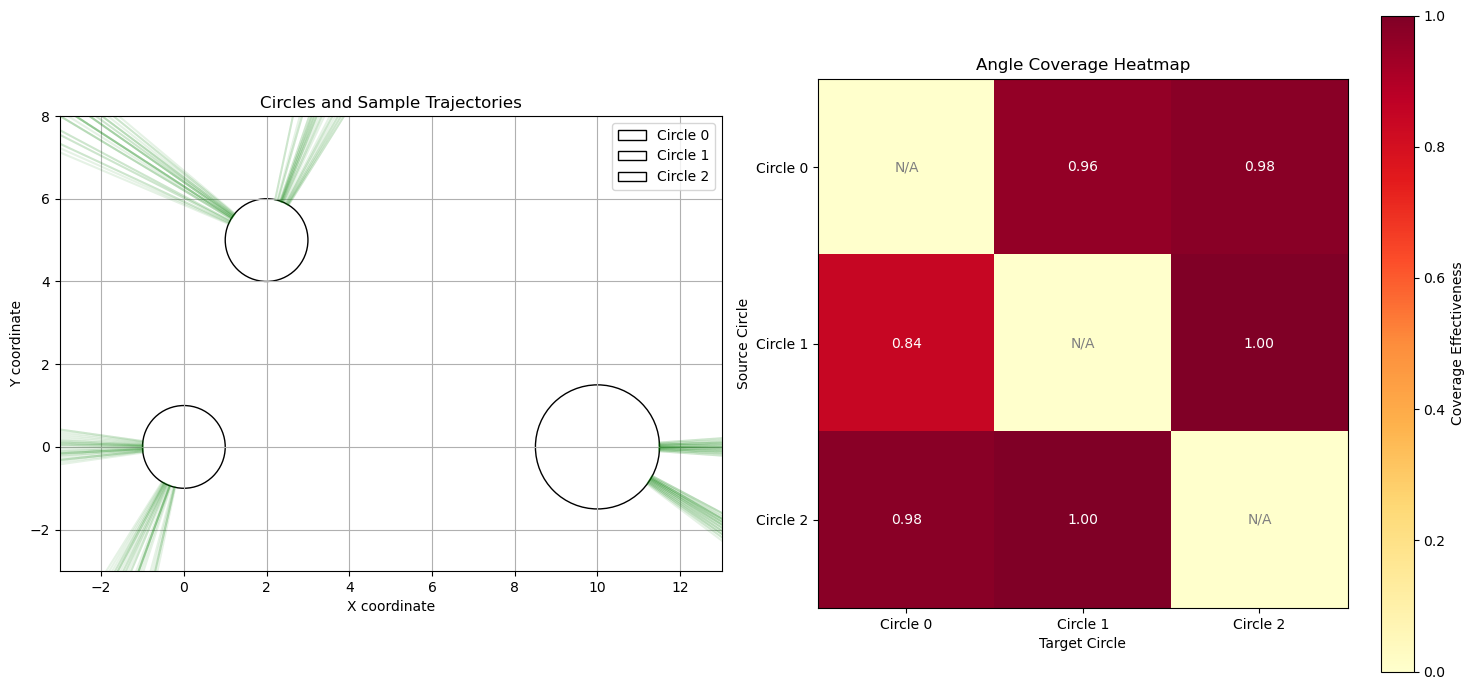

In [50]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Optional, Dict
import matplotlib.pyplot as plt
from matplotlib.patches import Circle as PlotCircle
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
from collections import defaultdict

@dataclass
class Circle:
    x: float
    y: float
    radius: float

def calculate_line_circle_intersection(
    start_x: float, 
    start_y: float, 
    angle: float, 
    max_distance: float,
    circle_x: float,
    circle_y: float,
    circle_radius: float
) -> Optional[float]:
    """
    Standalone function for parallel processing compatibility.
    """
    angle_rad = np.radians(angle)
    dx = np.cos(angle_rad)
    dy = np.sin(angle_rad)
    
    cx = circle_x - start_x
    cy = circle_y - start_y
    
    a = dx * dx + dy * dy
    b = 2 * (dx * cx + dy * cy)
    c = cx * cx + cy * cy - circle_radius * circle_radius
    
    discriminant = b * b - 4 * a * c
    
    if discriminant < 0:
        return None
    
    t1 = (-b + np.sqrt(discriminant)) / (2 * a)
    t2 = (-b - np.sqrt(discriminant)) / (2 * a)
    
    valid_distances = [t for t in [t1, t2] if 0 <= t <= max_distance]
    return min(valid_distances) if valid_distances else None

def analyze_single_pair(args) -> Dict:
    """Standalone function for parallel processing compatibility."""
    source_idx, target_idx, angle_step, distance_step, source_circle, target_circle = args
    
    max_distance = np.sqrt((target_circle.x - source_circle.x)**2 + 
                          (target_circle.y - source_circle.y)**2) + target_circle.radius
    
    angles = np.arange(0, 360, angle_step)
    distances = np.arange(distance_step, max_distance, distance_step)
    
    intersection_data = {
        'count': 0,
        'angle_hist': defaultdict(int),
        'distance_hist': defaultdict(int),
        'successful_trajectories': []
    }
    
    for angle in angles:
        for distance in distances:
            start_x = source_circle.x + source_circle.radius * np.cos(np.radians(angle))
            start_y = source_circle.y + source_circle.radius * np.sin(np.radians(angle))
            
            intersection_dist = calculate_line_circle_intersection(
                start_x, start_y, angle, distance,
                target_circle.x, target_circle.y, target_circle.radius
            )
            
            if intersection_dist is not None:
                intersection_data['count'] += 1
                intersection_data['angle_hist'][int(angle)] += 1
                intersection_data['distance_hist'][int(intersection_dist)] += 1
                intersection_data['successful_trajectories'].append((
                    start_x, start_y, angle, intersection_dist
                ))
    
    return {
        'source_circle': source_idx,
        'target_circle': target_idx,
        'data': intersection_data
    }

class ProjectileAnalyzer:
    def __init__(self, circles: List[Circle]):
        self.circles = circles

    def analyze_projectile_coverage(
        self,
        angle_step: float = 1.0,
        distance_step: float = 0.1,
        parallel: bool = True
    ) -> List[dict]:
        """
        Analyze projectile coverage with enhanced statistics and fixed parallel processing.
        """
        pairs = [
            (i, j, angle_step, distance_step, self.circles[i], self.circles[j])
            for i in range(len(self.circles))
            for j in range(len(self.circles))
            if i != j
        ]
        
        if parallel and len(pairs) > 1:
            try:
                num_processes = min(multiprocessing.cpu_count(), len(pairs))
                with ProcessPoolExecutor(max_workers=num_processes) as executor:
                    results = list(executor.map(analyze_single_pair, pairs))
            except Exception as e:
                print(f"Parallel processing failed: {e}. Falling back to sequential processing.")
                results = [analyze_single_pair(pair) for pair in pairs]
        else:
            results = [analyze_single_pair(pair) for pair in pairs]
            
        # Rest of the code remains the same
        organized_results = defaultdict(list)
        for result in results:
            organized_results[result['source_circle']].append({
                'target_circle': result['target_circle'],
                'intersection_data': result['data']
            })
            
        final_results = []
        for source_idx, intersections in organized_results.items():
            circle_stats = {
                'source_circle': source_idx,
                'intersections': []
            }
            
            for intersection in intersections:
                data = intersection['intersection_data']
                total_combinations = len(np.arange(0, 360, angle_step)) * \
                                  len(np.arange(distance_step, 
                                              max(data['distance_hist'].keys()) + distance_step, 
                                              distance_step))
                
                angle_coverage = {
                    angle: count / max(data['angle_hist'].values())
                    for angle, count in data['angle_hist'].items()
                }
                
                distance_coverage = {
                    dist: count / max(data['distance_hist'].values())
                    for dist, count in data['distance_hist'].items()
                }
                
                circle_stats['intersections'].append({
                    'target_circle': intersection['target_circle'],
                    'intersection_percentage': (data['count'] / total_combinations) * 100,
                    'most_effective_angles': sorted(
                        angle_coverage.items(),
                        key=lambda x: x[1],
                        reverse=True
                    )[:5],
                    'most_common_distances': sorted(
                        distance_coverage.items(),
                        key=lambda x: x[1],
                        reverse=True
                    )[:5],
                    'successful_trajectories': data['successful_trajectories']
                })
                
            final_results.append(circle_stats)
            
        return final_results

    def visualize_analysis(
        self,
        results: List[dict],
        show_trajectories: bool = True,
        num_trajectories: int = 50
    ):
        """
        Visualize the circles and optionally show sample successful trajectories.
        Fixed version with proper trajectory sampling.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
        
        # Plot circles and trajectories
        ax1.set_title('Circles and Sample Trajectories')
        for i, circle in enumerate(self.circles):
            circle_patch = PlotCircle(
                (circle.x, circle.y),
                circle.radius,
                fill=False,
                label=f'Circle {i}'
            )
            ax1.add_patch(circle_patch)
            
        if show_trajectories:
            for result in results:
                source_idx = result['source_circle']
                
                for intersection in result['intersections']:
                    trajectories = intersection['successful_trajectories']
                    if trajectories:
                        # Convert trajectories list to numpy array for proper sampling
                        trajectories_array = np.array(trajectories)
                        sample_size = min(num_trajectories, len(trajectories_array))
                        
                        # Generate random indices for sampling
                        sampled_indices = np.random.choice(
                            len(trajectories_array),
                            size=sample_size,
                            replace=False
                        )
                        
                        # Use the indices to sample trajectories
                        sampled_trajectories = trajectories_array[sampled_indices]
                        
                        for trajectory in sampled_trajectories:
                            start_x, start_y, angle, distance = trajectory
                            angle_rad = np.radians(angle)
                            end_x = start_x + distance * np.cos(angle_rad)
                            end_y = start_y + distance * np.sin(angle_rad)
                            ax1.plot([start_x, end_x], [start_y, end_y], 
                                   'g-', alpha=0.1)
        
        # Set equal aspect ratio and add grid
        ax1.set_aspect('equal', adjustable='box')
        ax1.grid(True)
        ax1.legend()
        
        # Add axis labels
        ax1.set_xlabel('X coordinate')
        ax1.set_ylabel('Y coordinate')
        
        # Automatically set limits with some padding
        all_x = [circle.x for circle in self.circles]
        all_y = [circle.y for circle in self.circles]
        max_radius = max(circle.radius for circle in self.circles)
        padding = max_radius * 2
        
        ax1.set_xlim(min(all_x) - padding, max(all_x) + padding)
        ax1.set_ylim(min(all_y) - padding, max(all_y) + padding)
        
        # Plot angle coverage heatmap
        ax2.set_title('Angle Coverage Heatmap')
        angle_data = []
        for result in results:
            source_idx = result['source_circle']
            for intersection in result['intersections']:
                target_idx = intersection['target_circle']
                angles = [angle for angle, _ in intersection['most_effective_angles']]
                values = [value for _, value in intersection['most_effective_angles']]
                angle_data.append((source_idx, target_idx, angles, values))
        
        if angle_data:
            num_circles = len(self.circles)
            coverage_matrix = np.zeros((num_circles, num_circles))
            
            for source_idx, target_idx, _, values in angle_data:
                coverage_matrix[source_idx, target_idx] = np.mean(values)
            
            # Create heatmap with better styling
            im = ax2.imshow(coverage_matrix, cmap='YlOrRd', aspect='equal')
            plt.colorbar(im, ax=ax2, label='Coverage Effectiveness')
            
            # Improve heatmap annotations
            ax2.set_xlabel('Target Circle')
            ax2.set_ylabel('Source Circle')
            
            # Add text annotations with better formatting
            for i in range(num_circles):
                for j in range(num_circles):
                    if i != j:
                        text = f'{coverage_matrix[i, j]:.2f}'
                        color = 'white' if coverage_matrix[i, j] > 0.5 else 'black'
                        ax2.text(j, i, text, ha='center', va='center', color=color)
                    else:
                        ax2.text(j, i, 'N/A', ha='center', va='center', color='gray')
            
            # Set ticks
            ax2.set_xticks(range(num_circles))
            ax2.set_yticks(range(num_circles))
            ax2.set_xticklabels([f'Circle {i}' for i in range(num_circles)])
            ax2.set_yticklabels([f'Circle {i}' for i in range(num_circles)])
        
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create some example circles
    circles = [
        Circle(0, 0, 1),      # Circle at origin with radius 1
        Circle(10, 0, 1.5),    # Circle at (3,0) with radius 1.5
        Circle(2, 5, 1),    # Circle at (1.5,2) with radius 1
    ]
    
    # Create analyzer and run analysis
    analyzer = ProjectileAnalyzer(circles)
    results = analyzer.analyze_projectile_coverage(
        angle_step=1,
        distance_step=0.1,
        parallel=True
    )
    
    # Print detailed results
    for circle_stat in results:
        print(f"\nSource Circle {circle_stat['source_circle']}:")
        for intersection in circle_stat['intersections']:
            print(f"\n  Target Circle {intersection['target_circle']}:")
            print(f"    Intersection percentage: "
                  f"{intersection['intersection_percentage']:.2f}%")
            print("    Most effective angles (degrees):")
            for angle, effectiveness in intersection['most_effective_angles']:
                print(f"      {angle}°: {effectiveness:.2f}")
            print("    Most common intersection distances:")
            for distance, frequency in intersection['most_common_distances']:
                print(f"      {distance:.1f} units: {frequency:.2f}")
    
    # Visualize the results
    analyzer.visualize_analysis(results, show_trajectories=True, num_trajectories=30)

Parallel processing failed: A process in the process pool was terminated abruptly while the future was running or pending.. Falling back to sequential processing.


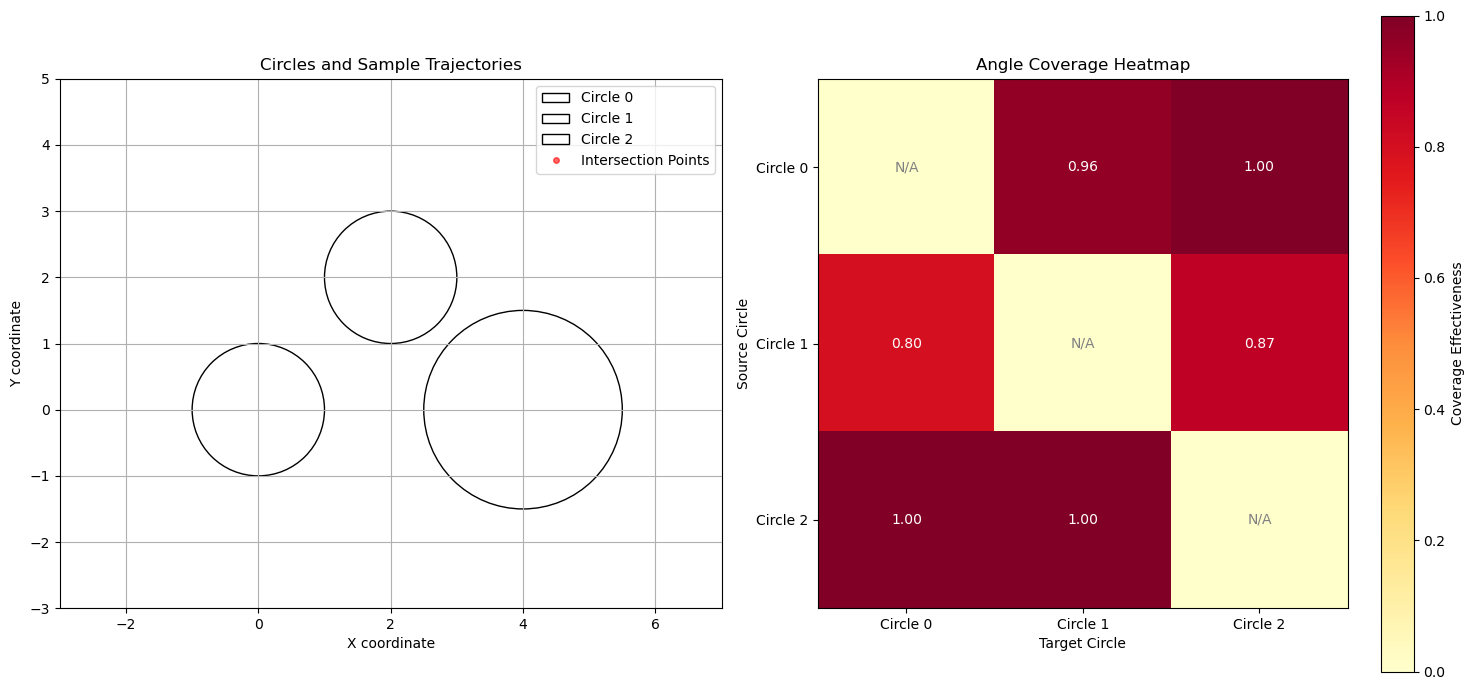

In [31]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Optional, Dict
import matplotlib.pyplot as plt
from matplotlib.patches import Circle as PlotCircle
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
from collections import defaultdict
import matplotlib.animation as animation
from matplotlib.collections import LineCollection

@dataclass
class Circle:
    x: float
    y: float
    radius: float

def calculate_line_circle_intersection(
    start_x: float, 
    start_y: float, 
    angle: float, 
    max_distance: float,
    circle_x: float,
    circle_y: float,
    circle_radius: float
) -> Optional[float]:
    """
    Standalone function for parallel processing compatibility.
    """
    angle_rad = np.radians(angle)
    dx = np.cos(angle_rad)
    dy = np.sin(angle_rad)
    
    cx = circle_x - start_x
    cy = circle_y - start_y
    
    a = dx * dx + dy * dy
    b = 2 * (dx * cx + dy * cy)
    c = cx * cx + cy * cy - circle_radius * circle_radius
    
    discriminant = b * b - 4 * a * c
    
    if discriminant < 0:
        return None
    
    t1 = (-b + np.sqrt(discriminant)) / (2 * a)
    t2 = (-b - np.sqrt(discriminant)) / (2 * a)
    
    valid_distances = [t for t in [t1, t2] if 0 <= t <= max_distance]
    return min(valid_distances) if valid_distances else None

def analyze_single_pair(args) -> Dict:
    """Standalone function for parallel processing compatibility."""
    source_idx, target_idx, angle_step, distance_step, source_circle, target_circle = args
    
    max_distance = np.sqrt((target_circle.x - source_circle.x)**2 + 
                          (target_circle.y - source_circle.y)**2) + target_circle.radius
    
    angles = np.arange(0, 360, angle_step)
    distances = np.arange(distance_step, max_distance, distance_step)
    
    intersection_data = {
        'count': 0,
        'angle_hist': defaultdict(int),
        'distance_hist': defaultdict(int),
        'successful_trajectories': []
    }
    
    for angle in angles:
        for distance in distances:
            start_x = source_circle.x + source_circle.radius * np.cos(np.radians(angle))
            start_y = source_circle.y + source_circle.radius * np.sin(np.radians(angle))
            
            intersection_dist = calculate_line_circle_intersection(
                start_x, start_y, angle, distance,
                target_circle.x, target_circle.y, target_circle.radius
            )
            
            if intersection_dist is not None:
                intersection_data['count'] += 1
                intersection_data['angle_hist'][int(angle)] += 1
                intersection_data['distance_hist'][int(intersection_dist)] += 1
                intersection_data['successful_trajectories'].append((
                    start_x, start_y, angle, intersection_dist
                ))
    
    return {
        'source_circle': source_idx,
        'target_circle': target_idx,
        'data': intersection_data
    }

# [Previous standalone helper functions remain the same]

class ProjectileAnalyzer:
    def __init__(self, circles: List[Circle]):
        self.circles = circles
        
    def analyze_projectile_coverage(
        self,
        angle_step: float = 1.0,
        distance_step: float = 0.1,
        parallel: bool = True
    ) -> List[dict]:
        # [Previous analyze_projectile_coverage implementation remains the same]
        pairs = [
            (i, j, angle_step, distance_step, self.circles[i], self.circles[j])
            for i in range(len(self.circles))
            for j in range(len(self.circles))
            if i != j
        ]
        
        if parallel and len(pairs) > 1:
            try:
                num_processes = min(multiprocessing.cpu_count(), len(pairs))
                with ProcessPoolExecutor(max_workers=num_processes) as executor:
                    results = list(executor.map(analyze_single_pair, pairs))
            except Exception as e:
                print(f"Parallel processing failed: {e}. Falling back to sequential processing.")
                results = [analyze_single_pair(pair) for pair in pairs]
        else:
            results = [analyze_single_pair(pair) for pair in pairs]
            
        # Rest of the code remains the same
        organized_results = defaultdict(list)
        for result in results:
            organized_results[result['source_circle']].append({
                'target_circle': result['target_circle'],
                'intersection_data': result['data']
            })
            
        final_results = []
        for source_idx, intersections in organized_results.items():
            circle_stats = {
                'source_circle': source_idx,
                'intersections': []
            }
            
            for intersection in intersections:
                data = intersection['intersection_data']
                total_combinations = len(np.arange(0, 360, angle_step)) * \
                                  len(np.arange(distance_step, 
                                              max(data['distance_hist'].keys()) + distance_step, 
                                              distance_step))
                
                angle_coverage = {
                    angle: count / max(data['angle_hist'].values())
                    for angle, count in data['angle_hist'].items()
                }
                
                distance_coverage = {
                    dist: count / max(data['distance_hist'].values())
                    for dist, count in data['distance_hist'].items()
                }
                
                circle_stats['intersections'].append({
                    'target_circle': intersection['target_circle'],
                    'intersection_percentage': (data['count'] / total_combinations) * 100,
                    'most_effective_angles': sorted(
                        angle_coverage.items(),
                        key=lambda x: x[1],
                        reverse=True
                    )[:5],
                    'most_common_distances': sorted(
                        distance_coverage.items(),
                        key=lambda x: x[1],
                        reverse=True
                    )[:5],
                    'successful_trajectories': data['successful_trajectories']
                })
                
            final_results.append(circle_stats)
            
        return final_results

    def visualize_analysis(
        self,
        results: List[dict],
        show_trajectories: bool = True,
        num_trajectories: int = 50,
        animate: bool = True,
        animation_interval: int = 50
    ):
        """
        Visualize the circles and trajectories with animation and clear intersection points.
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
        
        # Plot circles
        ax1.set_title('Circles and Sample Trajectories')
        for i, circle in enumerate(self.circles):
            circle_patch = PlotCircle(
                (circle.x, circle.y),
                circle.radius,
                fill=False,
                label=f'Circle {i}'
            )
            ax1.add_patch(circle_patch)
        
        # Collect all trajectories
        all_trajectories = []
        all_intersections = []
        trajectory_colors = []
        
        if show_trajectories:
            for result in results:
                source_idx = result['source_circle']
                color = plt.cm.tab10(source_idx / len(self.circles))
                
                for intersection in result['intersections']:
                    trajectories = intersection['successful_trajectories']
                    if trajectories:
                        trajectories_array = np.array(trajectories)
                        sample_size = min(num_trajectories, len(trajectories_array))
                        sampled_indices = np.random.choice(
                            len(trajectories_array),
                            size=sample_size,
                            replace=False
                        )
                        sampled_trajectories = trajectories_array[sampled_indices]
                        
                        for trajectory in sampled_trajectories:
                            start_x, start_y, angle, intersection_dist = trajectory
                            angle_rad = np.radians(angle)
                            end_x = start_x + intersection_dist * np.cos(angle_rad)
                            end_y = start_y + intersection_dist * np.sin(angle_rad)
                            
                            all_trajectories.append([(start_x, start_y), (end_x, end_y)])
                            all_intersections.append((end_x, end_y))
                            trajectory_colors.append(color)
        
        # Convert to numpy arrays for efficiency
        if all_intersections:
            all_intersections = np.array(all_intersections)
        
            # Set up animation if requested
            if animate:
                line_collection = LineCollection([], alpha=0.3)
                ax1.add_collection(line_collection)
                
                intersection_points, = ax1.plot([], [], 'o', color='red', 
                                             markersize=4, alpha=0.6, 
                                             label='Intersection Points')
                
                def init():
                    line_collection.set_segments([])
                    intersection_points.set_data([], [])
                    return line_collection, intersection_points
                
                def update(frame):
                    n = int((frame + 1) * len(all_trajectories) / 100)
                    current_trajectories = all_trajectories[:n]
                    current_colors = trajectory_colors[:n]
                    
                    line_collection.set_segments(current_trajectories)
                    line_collection.set_color(current_colors)
                    
                    if n > 0:
                        current_intersections = all_intersections[:n]
                        intersection_points.set_data(
                            current_intersections[:, 0],
                            current_intersections[:, 1]
                        )
                    
                    return line_collection, intersection_points
                
                anim = animation.FuncAnimation(
                    fig, update, init_func=init, frames=100,
                    interval=animation_interval, blit=True
                )
            else:
                # Draw all trajectories at once if not animating
                line_collection = LineCollection(all_trajectories, colors=trajectory_colors, alpha=0.3)
                ax1.add_collection(line_collection)
                
                # Plot intersection points
                ax1.plot(all_intersections[:, 0], all_intersections[:, 1], 'o',
                        color='red', markersize=4, alpha=0.6, 
                        label='Intersection Points')
        
        # Set equal aspect ratio and add grid
        ax1.set_aspect('equal', adjustable='box')
        ax1.grid(True)
        ax1.legend()
        
        # Set axis labels and limits
        ax1.set_xlabel('X coordinate')
        ax1.set_ylabel('Y coordinate')
        
        # Automatically set limits with padding
        all_x = [circle.x for circle in self.circles]
        all_y = [circle.y for circle in self.circles]
        max_radius = max(circle.radius for circle in self.circles)
        padding = max_radius * 2
        
        ax1.set_xlim(min(all_x) - padding, max(all_x) + padding)
        ax1.set_ylim(min(all_y) - padding, max(all_y) + padding)
        
        # Plot angle coverage heatmap
        ax2.set_title('Angle Coverage Heatmap')
        angle_data = []
        for result in results:
            source_idx = result['source_circle']
            for intersection in result['intersections']:
                target_idx = intersection['target_circle']
                angles = [angle for angle, _ in intersection['most_effective_angles']]
                values = [value for _, value in intersection['most_effective_angles']]
                angle_data.append((source_idx, target_idx, angles, values))
        
        if angle_data:
            num_circles = len(self.circles)
            coverage_matrix = np.zeros((num_circles, num_circles))
            
            for source_idx, target_idx, _, values in angle_data:
                coverage_matrix[source_idx, target_idx] = np.mean(values)
            
            im = ax2.imshow(coverage_matrix, cmap='YlOrRd')
            plt.colorbar(im, ax=ax2, label='Coverage Effectiveness')
            
            ax2.set_xlabel('Target Circle')
            ax2.set_ylabel('Source Circle')
            
            for i in range(num_circles):
                for j in range(num_circles):
                    if i != j:
                        text = f'{coverage_matrix[i, j]:.2f}'
                        color = 'white' if coverage_matrix[i, j] > 0.5 else 'black'
                        ax2.text(j, i, text, ha='center', va='center', color=color)
                    else:
                        ax2.text(j, i, 'N/A', ha='center', va='center', color='gray')
            
            ax2.set_xticks(range(num_circles))
            ax2.set_yticks(range(num_circles))
            ax2.set_xticklabels([f'Circle {i}' for i in range(num_circles)])
            ax2.set_yticklabels([f'Circle {i}' for i in range(num_circles)])
        
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    circles = [
        Circle(0, 0, 1),
        Circle(4, 0, 1.5),
        Circle(2, 2, 1),
    ]
    
    analyzer = ProjectileAnalyzer(circles)
    results = analyzer.analyze_projectile_coverage(
        angle_step=5,
        distance_step=0.2,
        parallel=True
    )
    
    analyzer.visualize_analysis(
        results,
        show_trajectories=True,
        num_trajectories=30,
        animate=True,
        animation_interval=50
    )

Parallel processing failed: A process in the process pool was terminated abruptly while the future was running or pending.. Falling back to sequential processing.


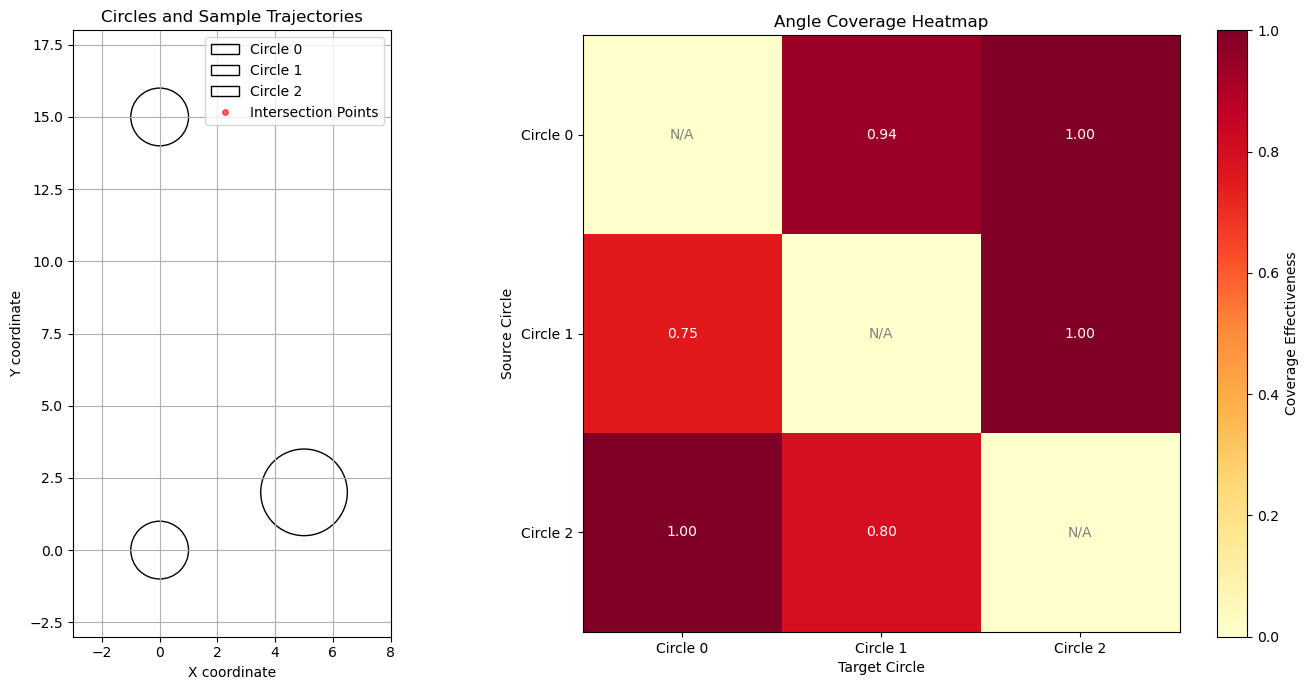

In [26]:
# Create circles
circles = [
    Circle(0, 0, 1),
    Circle(5, 2, 1.5),
    Circle(0, 15, 1)
]

# Create analyzer
analyzer = ProjectileAnalyzer(circles)

# Run analysis
results = analyzer.analyze_projectile_coverage(
    angle_step=5,
    distance_step=0.2,
    parallel=True
)

# Visualize results
analyzer.visualize_analysis(results, show_trajectories=True, num_trajectories=100)

In [2]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple

@dataclass
class Circle:
    x: float
    y: float
    radius: float

def get_intersection_angles(source: Circle, borders: List[Circle]) -> float:
    """
    Calculate the percentage of angles from the source circle that intersect with border circles.
    
    Args:
        source: Circle representing the light source
        borders: List of Circle objects representing the borders
    
    Returns:
        float: Percentage of angles that intersect with borders (0-100)
    """
    # Store all angle ranges where intersections occur
    intersection_ranges = []
    
    for border in borders:
        # Calculate distance between circle centers
        dx = border.x - source.x
        dy = border.y - source.y
        distance = np.sqrt(dx**2 + dy**2)
        
        # Skip if circles don't interact
        if distance > source.radius + border.radius:
            continue
            
        # Calculate angles to tangent points
        # Using the law of cosines to find the angle
        if distance == 0:
            # Complete overlap case
            if border.radius >= source.radius:
                return 100.0
            continue
            
        # Calculate the angles to the tangent points
        theta = np.arccos((dx) / distance)  # Base angle from x-axis
        if dy < 0:
            theta = 2 * np.pi - theta
            
        # Calculate half-angle of intersection using law of cosines
        if distance < border.radius:
            # Source is inside the border
            alpha = np.pi
        else:
            cos_alpha = (distance**2 + source.radius**2 - border.radius**2) / (2 * distance * source.radius)
            cos_alpha = np.clip(cos_alpha, -1.0, 1.0)  # Handle floating point errors
            alpha = np.arccos(cos_alpha)
            
        # Add the range of angles that intersect
        start_angle = (theta - alpha) % (2 * np.pi)
        end_angle = (theta + alpha) % (2 * np.pi)
        intersection_ranges.append((start_angle, end_angle))
    
    # Merge overlapping ranges
    if not intersection_ranges:
        return 0.0
        
    # Sort ranges by start angle
    intersection_ranges.sort()
    
    # Merge overlapping ranges
    merged = [intersection_ranges[0]]
    for current in intersection_ranges[1:]:
        previous = merged[-1]
        if current[0] <= previous[1]:
            # Ranges overlap, merge them
            merged[-1] = (previous[0], max(previous[1], current[1]))
        else:
            merged.append(current)
    
    # Calculate total angle covered
    total_angle = 0.0
    for start, end in merged:
        if end < start:  # Handle wrap around
            total_angle += (2 * np.pi - start) + end
        else:
            total_angle += end - start
            
    # Convert to percentage
    return (total_angle / (2 * np.pi)) * 100

# Example usage
def example():
    # Create a light source
    source = Circle(0, 0, 2)
    
    # Create some border circles
    borders = [
        Circle(2, 0, 1),    # Right
        Circle(-2, 0, 1),   # Left
        Circle(0, 2, 1),    # Top
    ]
    
    # Calculate intersection percentage
    percentage = get_intersection_angles(source, borders)
    print(f"Percentage of angles intersecting borders: {percentage:.1f}%")

if __name__ == "__main__":
    example()

Percentage of angles intersecting borders: 48.3%


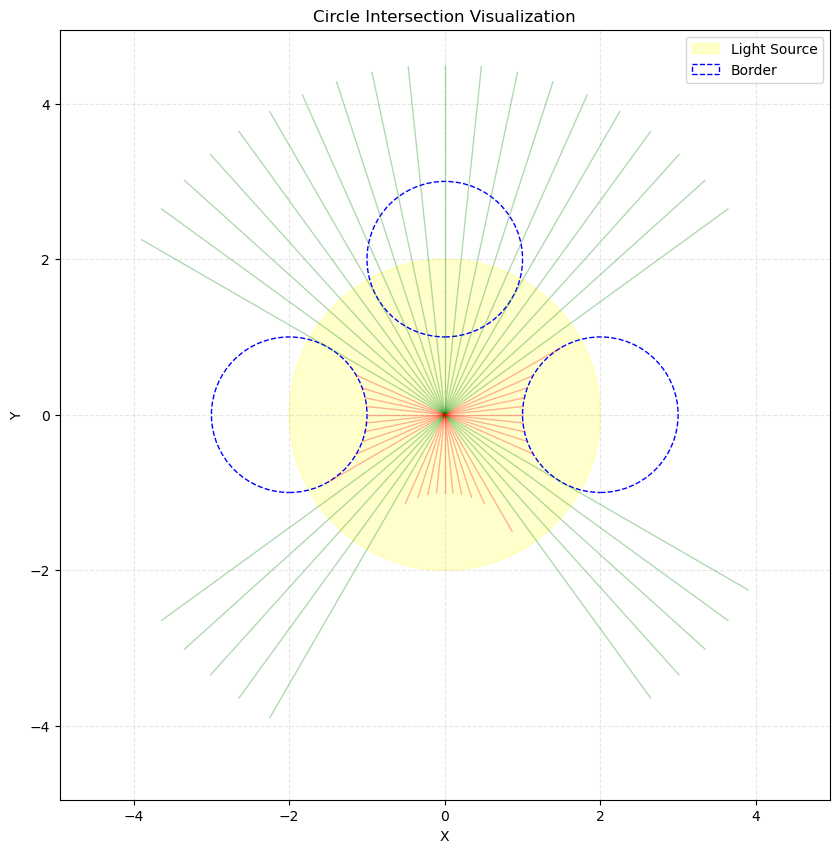

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from typing import List, Tuple
from dataclasses import dataclass

@dataclass
class CircleObj:
    x: float
    y: float
    radius: float

def visualize_circle_intersections(source: CircleObj, borders: List[CircleObj], num_rays: int = 60):
    """
    Visualize the light source, border circles, and intersection rays.
    
    Args:
        source: CircleObj representing the light source
        borders: List of CircleObj objects representing the borders
        num_rays: Number of rays to visualize (default: 60)
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot source circle
    source_circle = Circle((source.x, source.y), source.radius, 
                         fill=True, alpha=0.2, color='yellow', 
                         label='Light Source')
    ax.add_patch(source_circle)
    
    # Plot border circles
    for border in borders:
        border_circle = Circle((border.x, border.y), border.radius,
                             fill=False, linestyle='--', color='blue',
                             label='Border')
        ax.add_patch(border_circle)
    
    # Calculate and plot rays
    angles = np.linspace(0, 2*np.pi, num_rays, endpoint=False)
    ray_length = max(
        abs(border.x) + border.radius 
        for border in borders + [source]
    ) * 1.5
    
    for angle in angles:
        # Calculate ray endpoints
        end_x = source.x + ray_length * np.cos(angle)
        end_y = source.y + ray_length * np.sin(angle)
        
        # Check if ray intersects any border
        intersects = False
        min_intersection_dist = ray_length
        
        for border in borders:
            # Vector from source to border center
            dx = border.x - source.x
            dy = border.y - source.y
            
            # Calculate discriminant for ray-circle intersection
            ray_dx = np.cos(angle)
            ray_dy = np.sin(angle)
            
            a = ray_dx**2 + ray_dy**2
            b = 2 * (ray_dx*dx + ray_dy*dy)
            c = dx**2 + dy**2 - border.radius**2
            
            discriminant = b**2 - 4*a*c
            
            if discriminant >= 0:
                # Calculate intersection points
                t1 = (-b - np.sqrt(discriminant)) / (2*a)
                t2 = (-b + np.sqrt(discriminant)) / (2*a)
                
                # Filter positive intersection points
                positive_intersections = [t for t in [t1, t2] if t > 0]
                
                if positive_intersections:
                    # Ray intersects circle in front of source
                    intersects = True
                    t = min(positive_intersections)
                    min_intersection_dist = min(min_intersection_dist, t)
        
        # Draw ray
        if intersects:
            color = 'red'
            end_x = source.x + min_intersection_dist * np.cos(angle)
            end_y = source.y + min_intersection_dist * np.sin(angle)
        else:
            color = 'green'
            
        plt.plot([source.x, end_x], [source.y, end_y], 
                 color=color, alpha=0.3, linewidth=1)
    
    # Set axis properties
    ax.set_aspect('equal')
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Add legend with unique entries
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    
    # Set limits
    margin = ray_length * 0.1
    plt.xlim(source.x - ray_length - margin, source.x + ray_length + margin)
    plt.ylim(source.y - ray_length - margin, source.y + ray_length + margin)
    
    plt.title('Circle Intersection Visualization')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    return fig, ax

def main():
    # Create example circles
    source = CircleObj(0, 0, 2)
    borders = [
        CircleObj(2, 0, 1),    # Right
        CircleObj(-2, 0, 1),   # Left
        CircleObj(0, 2, 1),    # Top
    ]
    
    # Create visualization
    fig, ax = visualize_circle_intersections(source, borders)
    plt.show()

if __name__ == "__main__":
    main()


Summary Statistics:
Average Intersection Percentage: 81.7%
Maximum Intersection Percentage: 930.3%
Minimum Intersection Percentage: 0.0%


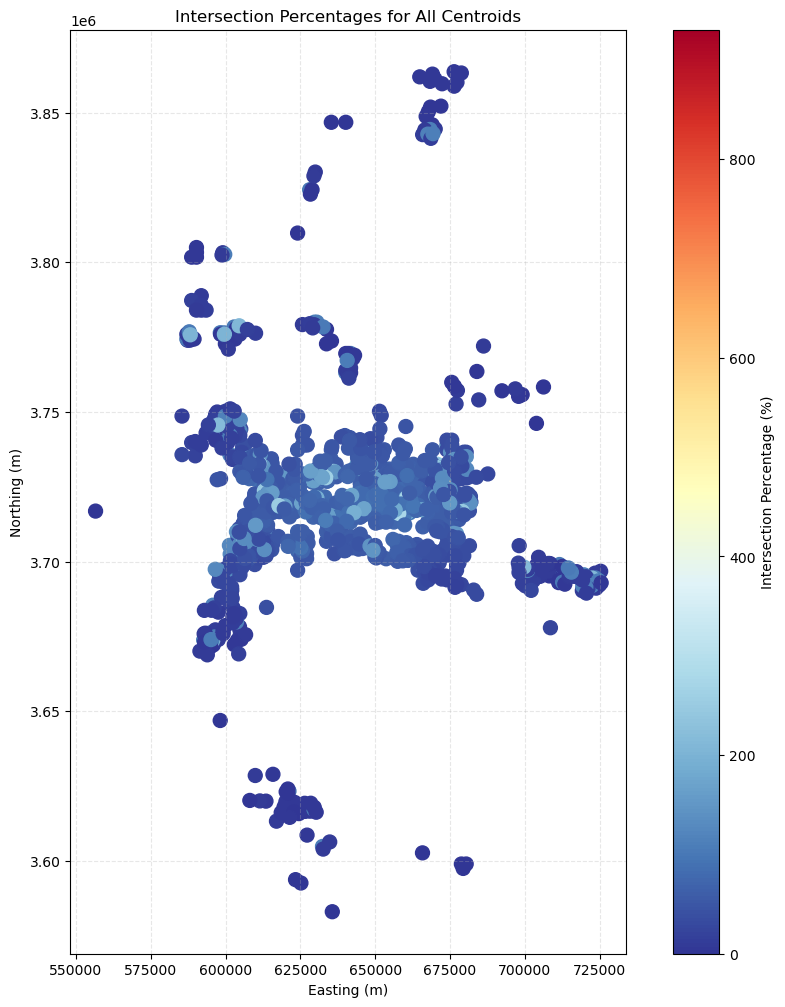

KeyboardInterrupt: 

In [7]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

@dataclass
class CircleObj:
    x: float
    y: float
    radius: float

def get_intersection_percentage(source: CircleObj, borders: List[CircleObj]) -> float:
    """
    Calculate the percentage of angles from the source that intersect with borders.
    
    Args:
        source: CircleObj representing the light source
        borders: List of CircleObj objects representing the borders
    
    Returns:
        float: Percentage of angles intersecting with borders (0-100)
    """
    # Store all angle ranges where intersections occur
    intersection_ranges = []
    
    for border in borders:
        # Calculate distance between circle centers
        dx = border.x - source.x
        dy = border.y - source.y
        distance = np.sqrt(dx**2 + dy**2)
        
        # Skip if circles don't interact
        if distance > source.radius + border.radius:
            continue
            
        # If circles completely overlap
        if distance == 0:
            if border.radius >= source.radius:
                return 100.0
            continue
            
        # Calculate the angles to the tangent points
        theta = np.arccos((dx) / distance) if distance > 0 else 0  
        if dy < 0:
            theta = 2 * np.pi - theta
            
        # Calculate half-angle of intersection
        if distance < border.radius:
            # Source is inside the border
            alpha = np.pi
        else:
            cos_alpha = (distance**2 + source.radius**2 - border.radius**2) / (2 * distance * source.radius)
            cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
            alpha = np.arccos(cos_alpha)
            
        # Add the range of angles that intersect
        start_angle = (theta - alpha) % (2 * np.pi)
        end_angle = (theta + alpha) % (2 * np.pi)
        intersection_ranges.append((start_angle, end_angle))
    
    if not intersection_ranges:
        return 0.0
        
    # Sort and merge overlapping ranges
    intersection_ranges.sort()
    merged = [intersection_ranges[0]]
    
    for current in intersection_ranges[1:]:
        previous = merged[-1]
        if current[0] <= previous[1]:
            merged[-1] = (previous[0], max(previous[1], current[1]))
        else:
            merged.append(current)
    
    # Calculate total angle covered
    total_angle = 0.0
    for start, end in merged:
        if end < start:  # Handle wrap around
            total_angle += (2 * np.pi - start) + end
        else:
            total_angle += end - start
            
    return (total_angle / (2 * np.pi)) * 100

def analyze_centroids(centroid_file: str, source_radius: float, border_radius: float) -> pd.DataFrame:
    """
    Analyze intersection percentages for centroids from a CSV file.
    
    Args:
        centroid_file: Path to CSV file with columns for ID, easting, northing
        source_radius: Radius for the light source circles
        border_radius: Radius for the border circles
    
    Returns:
        pd.DataFrame: Original data with intersection percentages added
    """
    # Read centroid data
    centroids = pd.read_csv(centroid_file)
    
    # Create list to store results
    results = []
    
    # Process each centroid
    for i, row in centroids.iterrows():
        # Create source circle at centroid location
        source = CircleObj(row['easting'], row['northing'], source_radius)
        
        # Create list of border circles (all other centroids)
        borders = []
        for j, other_row in centroids.iterrows():
            if i != j:  # Skip the current centroid
                border = CircleObj(
                    other_row['easting'],
                    other_row['northing'],
                    border_radius
                )
                borders.append(border)
        
        # Calculate intersection percentage
        intersection_pct = get_intersection_percentage(source, borders)
        
        # Store results
        results.append({
            'centroid_id': row['centroid_id'],
            'easting': row['easting'],
            'northing': row['northing'],
            'intersection_percentage': intersection_pct
        })
    
    return pd.DataFrame(results)

def visualize_results(results: pd.DataFrame, source_radius: float, border_radius: float, 
                     sample_id: int = None):
    """
    Visualize the results for a specific centroid or all centroids.
    
    Args:
        results: DataFrame with analysis results
        source_radius: Radius of source circles
        border_radius: Radius of border circles
        sample_id: Optional ID of specific centroid to visualize
    """
    fig, ax = plt.subplots(figsize=(12, 12))
    
    if sample_id is not None:
        # Visualize specific centroid
        source_row = results[results['centroid_id'] == sample_id].iloc[0]
        source = CircleObj(source_row['easting'], source_row['northing'], source_radius)
        
        # Create source circle
        source_circle = Circle((source.x, source.y), source_radius,
                             fill=True, alpha=0.2, color='yellow',
                             label=f'Source (ID: {sample_id})')
        ax.add_patch(source_circle)
        
        # Create border circles for other centroids
        borders = results[results['centroid_id'] != sample_id]
        for _, row in borders.iterrows():
            border_circle = Circle((row['easting'], row['northing']), border_radius,
                                 fill=False, linestyle='--', color='blue',
                                 label='Border')
            ax.add_patch(border_circle)
            
        plt.title(f'Intersection Analysis for Centroid {sample_id}\n'
                 f'Intersection Percentage: {source_row["intersection_percentage"]:.1f}%')
    else:
        # Visualize all centroids with color-coded intersection percentages
        scatter = plt.scatter(results['easting'], results['northing'],
                            c=results['intersection_percentage'],
                            cmap='RdYlBu_r', s=100)
        plt.colorbar(scatter, label='Intersection Percentage (%)')
        plt.title('Intersection Percentages for All Centroids')
    
    ax.set_aspect('equal')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    
    if sample_id is not None:
        plt.legend()
    
    return fig, ax

def main():
    # Example usage
    centroid_file = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/leks_for_model.csv"  # Replace with your file path
    source_radius = 19000  # Replace with your desired radius in meters
    border_radius = 2000  # Replace with your desired radius in meters
    
    # Analyze centroids
    results = analyze_centroids(centroid_file, source_radius, border_radius)
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Average Intersection Percentage: {results['intersection_percentage'].mean():.1f}%")
    print(f"Maximum Intersection Percentage: {results['intersection_percentage'].max():.1f}%")
    print(f"Minimum Intersection Percentage: {results['intersection_percentage'].min():.1f}%")
    
    # Create visualizations
    # Overall view
    visualize_results(results, source_radius, border_radius)
    plt.figure(1)
    
    # Sample individual centroid (using first ID as example)
    sample_id = results['centroid_id'].iloc[0]
    visualize_results(results, source_radius, border_radius, sample_id)
    plt.figure(2)
    
    plt.show()
    
    # Save results to CSV
    results.to_csv('E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/intersection_results.csv', index=False)
    print("\nResults saved to 'intersection_results.csv'")

if __name__ == "__main__":
    main()

In [10]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

@dataclass
class CircleObj:
    x: float
    y: float
    radius: float

def get_intersection_percentage(source: CircleObj, borders: List[CircleObj]) -> float:
    """
    Calculate the percentage of angles from the source that intersect with borders.
    
    Args:
        source: CircleObj representing the light source
        borders: List of CircleObj objects representing the borders
    
    Returns:
        float: Percentage of angles intersecting with borders (0-100)
    """
    # Store all angle ranges where intersections occur
    intersection_ranges = []
    
    for border in borders:
        # Calculate distance between circle centers
        dx = border.x - source.x
        dy = border.y - source.y
        distance = np.sqrt(dx**2 + dy**2)
        
        # Skip if circles don't interact
        if distance > source.radius + border.radius:
            continue
            
        # If circles completely overlap
        if distance == 0:
            if border.radius >= source.radius:
                return 100.0
            continue
            
        # Calculate the angles to the tangent points
        theta = np.arccos((dx) / distance) if distance > 0 else 0  
        if dy < 0:
            theta = 2 * np.pi - theta
            
        # Calculate half-angle of intersection
        if distance < border.radius:
            # Source is inside the border
            alpha = np.pi
        else:
            cos_alpha = (distance**2 + source.radius**2 - border.radius**2) / (2 * distance * source.radius)
            cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
            alpha = np.arccos(cos_alpha)
            
        # Add the range of angles that intersect
        start_angle = (theta - alpha) % (2 * np.pi)
        end_angle = (theta + alpha) % (2 * np.pi)
        intersection_ranges.append((start_angle, end_angle))
    
    if not intersection_ranges:
        return 0.0
        
    # Sort and merge overlapping ranges
    intersection_ranges.sort()
    merged = [intersection_ranges[0]]
    
    for current in intersection_ranges[1:]:
        previous = merged[-1]
        if current[0] <= previous[1]:
            merged[-1] = (previous[0], max(previous[1], current[1]))
        else:
            merged.append(current)
    
    # Calculate total angle covered
    total_angle = 0.0
    for start, end in merged:
        if end < start:  # Handle wrap around
            total_angle += (2 * np.pi - start) + end
        else:
            total_angle += end - start
            
    return (total_angle / (2 * np.pi)) * 100

def analyze_centroids(centroid_file: str, source_radius: float, border_radius: float) -> pd.DataFrame:
    """
    Analyze intersection percentages for centroids from a CSV file.
    
    Args:
        centroid_file: Path to CSV file with columns for ID, easting, northing
        source_radius: Radius for the light source circles
        border_radius: Radius for the border circles
    
    Returns:
        pd.DataFrame: Original data with intersection percentages added
    """
    # Read centroid data
    centroids = pd.read_csv(centroid_file)
    
    # Create list to store results
    results = []
    
    # Process each centroid
    for i, row in centroids.iterrows():
        # Create source circle at centroid location
        source = CircleObj(row['easting'], row['northing'], source_radius)
        
        # Create list of border circles (all other centroids)
        borders = []
        for j, other_row in centroids.iterrows():
            if i != j:  # Skip the current centroid
                border = CircleObj(
                    other_row['easting'],
                    other_row['northing'],
                    border_radius
                )
                borders.append(border)
        
        # Calculate intersection percentage
        intersection_pct = get_intersection_percentage(source, borders)
        
        # Store results
        results.append({
            'centroid_id': row['centroid_id'],
            'easting': row['easting'],
            'northing': row['northing'],
            'intersection_percentage': intersection_pct
        })
    
    return pd.DataFrame(results)



def main():
    # Example usage
    centroid_file = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/leks_for_model.csv"  # Replace with your file path
    source_radius = 4800  # Replace with your desired radius in meters
    border_radius = 2000  # Replace with your desired radius in meters
    
    # Analyze centroids
    results = analyze_centroids(centroid_file, source_radius, border_radius)
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Average Intersection Percentage: {results['intersection_percentage'].mean():.1f}%")
    print(f"Maximum Intersection Percentage: {results['intersection_percentage'].max():.1f}%")
    print(f"Minimum Intersection Percentage: {results['intersection_percentage'].min():.1f}%")
    

    
    plt.show()
    
    # Save results to CSV
    results.to_csv('E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/intersection_results.csv', index=False)
    print("\nResults saved to 'intersection_results.csv'")

if __name__ == "__main__":
    main()


Summary Statistics:
Average Intersection Percentage: 99.0%
Maximum Intersection Percentage: 594.1%
Minimum Intersection Percentage: 0.0%

Results saved to 'intersection_results.csv'



Analyzing source at (-14500, 0)
Source radius: 19000m

Checking border 0 at (20000, 0)
Distance between centers: 34500.0m
Sum of radii: 21000m
No intersection - too far apart

Checking border 1 at (-15000, 0)
Distance between centers: 500.0m
Sum of radii: 21000m
Adding range: 180.0° to 180.0°

Checking border 2 at (-14000, 0)
Distance between centers: 500.0m
Sum of radii: 21000m
Adding range: 0.0° to 0.0°

Merged range: 0.0° to 0.0°
Adding angle: 0.0°

Merged range: 180.0° to 180.0°
Adding angle: 0.0°

Final percentage: 0.0%

Final intersection percentage: 0.0%


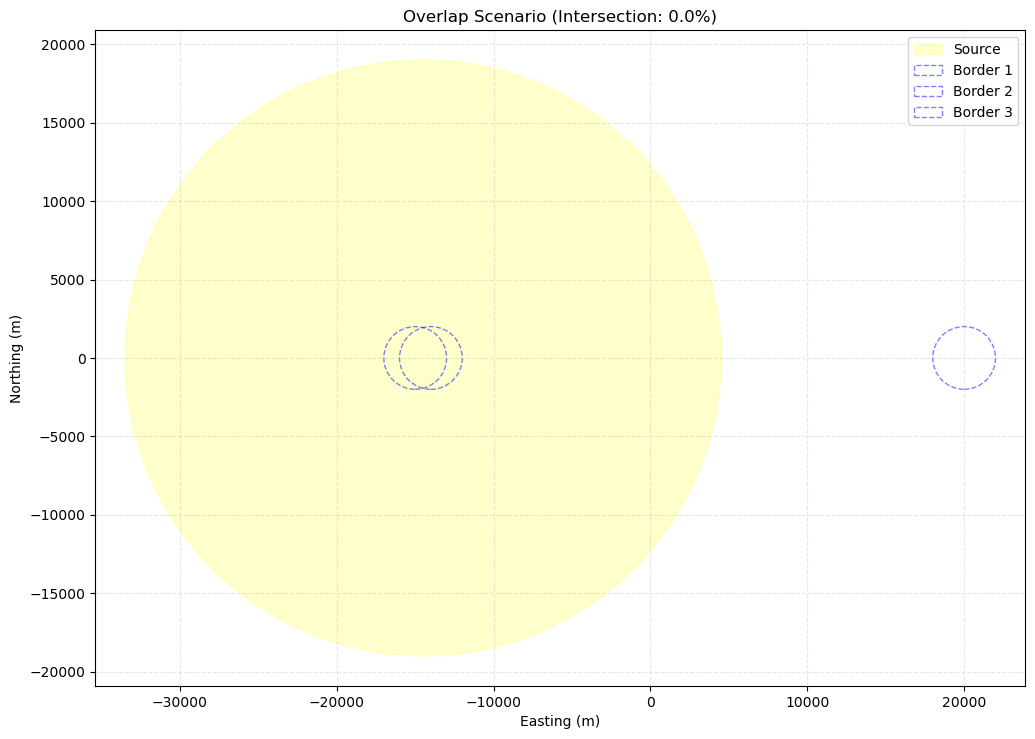

In [13]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

@dataclass
class CircleObj:
    x: float
    y: float
    radius: float

def get_intersection_percentage(source: CircleObj, borders: List[CircleObj], debug: bool = False) -> float:
    """
    Calculate the percentage of angles from the source that intersect with borders.
    
    Args:
        source: CircleObj representing the light source
        borders: List of CircleObj objects representing the borders
        debug: If True, print debugging information
    
    Returns:
        float: Percentage of angles intersecting with borders (0-100)
    """
    if debug:
        print(f"\nAnalyzing source at ({source.x}, {source.y})")
        print(f"Source radius: {source.radius}m")
    
    # First check if the source is completely contained within any border
    for border in borders:
        dx = border.x - source.x
        dy = border.y - source.y
        distance = np.sqrt(dx**2 + dy**2)
        
        # If source is completely inside a border and the distance from the center
        # is more than (border_radius - source_radius), it's 100% blocked
        if distance <= border.radius - source.radius:
            if debug:
                print(f"Source completely inside border at ({border.x}, {border.y})")
                print(f"Distance: {distance}m vs Border radius: {border.radius}m")
            return 100.0
    
    # Store all angle ranges where intersections occur
    intersection_ranges = []
    
    for i, border in enumerate(borders):
        dx = border.x - source.x
        dy = border.y - source.y
        distance = np.sqrt(dx**2 + dy**2)
        
        if debug:
            print(f"\nChecking border {i} at ({border.x}, {border.y})")
            print(f"Distance between centers: {distance}m")
            print(f"Sum of radii: {source.radius + border.radius}m")
        
        # Skip if circles don't interact
        if distance > source.radius + border.radius:
            if debug:
                print("No intersection - too far apart")
            continue
        
        # If circles are exactly on top of each other
        if distance == 0:
            if border.radius >= source.radius:
                if debug:
                    print("Exact overlap - 100% intersection")
                return 100.0
            continue
        
        # Calculate base angle from x-axis to border center
        theta = np.arccos(dx / distance)
        if dy < 0:
            theta = 2 * np.pi - theta
        
        # Calculate intersection angles using law of cosines
        cos_alpha = (distance**2 + source.radius**2 - border.radius**2) / (2 * distance * source.radius)
        
        # Handle numerical precision issues
        cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
        alpha = np.arccos(cos_alpha)
        
        # Calculate the range of angles that are blocked
        start_angle = (theta - alpha) % (2 * np.pi)
        end_angle = (theta + alpha) % (2 * np.pi)
        
        if debug:
            print(f"Adding range: {np.degrees(start_angle):.1f}° to {np.degrees(end_angle):.1f}°")
        
        intersection_ranges.append((start_angle, end_angle))
    
    if not intersection_ranges:
        return 0.0
    
    # Sort ranges by start angle
    intersection_ranges.sort()
    
    # Merge overlapping ranges
    merged = [intersection_ranges[0]]
    for current in intersection_ranges[1:]:
        previous = merged[-1]
        curr_start, curr_end = current
        prev_start, prev_end = previous
        
        # Handle wraparound
        if curr_start <= prev_end or curr_start <= (prev_end % (2 * np.pi)):
            # Ranges overlap - merge them
            merged[-1] = (prev_start, max(prev_end, curr_end))
        else:
            merged.append(current)
    
    # Calculate total angle covered
    total_angle = 0.0
    for start, end in merged:
        if end < start:  # Handle wraparound
            angle = (2 * np.pi - start) + end
        else:
            angle = end - start
        total_angle += angle
        
        if debug:
            print(f"\nMerged range: {np.degrees(start):.1f}° to {np.degrees(end):.1f}°")
            print(f"Adding angle: {np.degrees(angle):.1f}°")
    
    percentage = (total_angle / (2 * np.pi)) * 100
    
    if debug:
        print(f"\nFinal percentage: {percentage:.1f}%")
    
    return min(percentage, 100.0)

def visualize_overlap_scenario(source: CircleObj, borders: List[CircleObj], title: str = "Circle Overlap Scenario"):
    """
    Create a visualization of the source and border circles to help understand overlap.
    
    Args:
        source: Source circle
        borders: List of border circles
        title: Title for the plot
    """
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Plot source circle
    source_circle = Circle((source.x, source.y), source.radius,
                         fill=True, alpha=0.2, color='yellow',
                         label='Source')
    ax.add_patch(source_circle)
    
    # Plot border circles
    for i, border in enumerate(borders):
        border_circle = Circle((border.x, border.y), border.radius,
                             fill=False, linestyle='--', color='blue',
                             alpha=0.5, label=f'Border {i+1}')
        ax.add_patch(border_circle)
    
    # Set plot limits to show all circles
    all_circles = [source] + borders
    min_x = min(c.x - c.radius for c in all_circles)
    max_x = max(c.x + c.radius for c in all_circles)
    min_y = min(c.y - c.radius for c in all_circles)
    max_y = max(c.y + c.radius for c in all_circles)
    
    # Add some padding
    padding = max(source.radius, max(b.radius for b in borders)) * 0.1
    plt.xlim(min_x - padding, max_x + padding)
    plt.ylim(min_y - padding, max_y + padding)
    
    ax.set_aspect('equal')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.title(title)
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.legend()
    
    return fig, ax

def test_overlap_case():
    """
    Test function to demonstrate overlap calculations with your dimensions.
    """
    # Create a test case with typical dimensions
    source = CircleObj(-14500, 0, 19000)  # Source with 19km radius
    borders = [
        CircleObj(20000, 0, 2000),   # Border 2km radius, 20km away
        CircleObj(-15000, 0, 2000),  # Another border
        CircleObj(-14000, 0, 2000)    # Third border
    ]
    
    # Calculate intersection with debug output
    percentage = get_intersection_percentage(source, borders, debug=True)
    print(f"\nFinal intersection percentage: {percentage:.1f}%")
    
    # Visualize the scenario
    visualize_overlap_scenario(source, borders, 
                             f"Overlap Scenario (Intersection: {percentage:.1f}%)")
    plt.show()

if __name__ == "__main__":
    test_overlap_case()


Summary Statistics:
Average Intersection Percentage: 2.5%
Maximum Intersection Percentage: 78.5%
Minimum Intersection Percentage: 0.0%
Centroids contained by multiple borders: 531


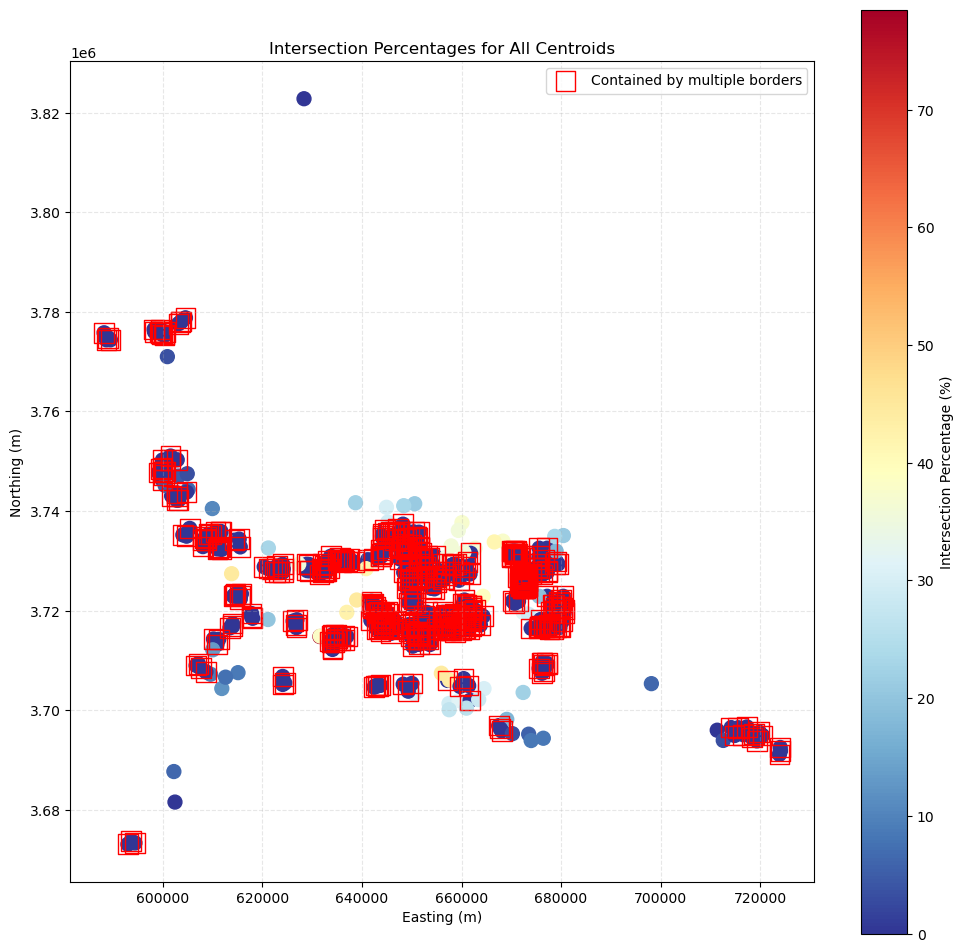


Results saved to 'intersection_results.csv'


In [21]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

@dataclass
class CircleObj:
    x: float
    y: float
    radius: float

def check_source_in_borders(source: CircleObj, borders: List[CircleObj]) -> int:
    """
    Check how many border circles contain the source point.
    
    Args:
        source: CircleObj representing the light source
        borders: List of CircleObj objects representing the borders
    
    Returns:
        int: Number of border circles containing the source
    """
    containing_borders = 0
    for border in borders:
        dx = border.x - source.x
        dy = border.y - source.y
        distance = np.sqrt(dx**2 + dy**2)
        
        if distance <= border.radius:
            containing_borders += 1
            
    return containing_borders

def get_intersection_percentage(source: CircleObj, borders: List[CircleObj], debug: bool = False) -> float:
    """
    Calculate the percentage of angles from the source that intersect with borders.
    Ignores all borders if source is within multiple border circles.
    
    Args:
        source: CircleObj representing the light source
        borders: List of CircleObj objects representing the borders
        debug: If True, print debugging information
    
    Returns:
        float: Percentage of angles intersecting with borders (0-100)
    """
    if debug:
        print(f"\nAnalyzing source at ({source.x}, {source.y})")
    
    # Check if source is within multiple borders
    containing_borders = check_source_in_borders(source, borders)
    if containing_borders >= 2:
        if debug:
            print(f"Source is within {containing_borders} borders - ignoring all borders")
        return 0.0
    
    # Store all angle ranges where intersections occur
    intersection_ranges = []
    
    for i, border in enumerate(borders):
        dx = border.x - source.x
        dy = border.y - source.y
        distance = np.sqrt(dx**2 + dy**2)
        
        if debug:
            print(f"\nChecking border {i} at ({border.x}, {border.y})")
            print(f"Distance between centers: {distance}m")
        
        # Skip if circles don't interact
        if distance > source.radius + border.radius:
            continue
        
        # If circles are exactly on top of each other
        if distance == 0:
            if border.radius >= source.radius:
                return 100.0
            continue
        
        # Calculate base angle from x-axis to border center
        theta = np.arccos(dx / distance)
        if dy < 0:
            theta = 2 * np.pi - theta
        
        # Calculate intersection angles using law of cosines
        cos_alpha = (distance**2 + source.radius**2 - border.radius**2) / (2 * distance * source.radius)
        cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
        alpha = np.arccos(cos_alpha)
        
        # Calculate the range of angles that are blocked
        start_angle = (theta - alpha) % (2 * np.pi)
        end_angle = (theta + alpha) % (2 * np.pi)
        
        if debug:
            print(f"Adding range: {np.degrees(start_angle):.1f}° to {np.degrees(end_angle):.1f}°")
        
        intersection_ranges.append((start_angle, end_angle))
    
    if not intersection_ranges:
        return 0.0
    
    # Merge overlapping ranges
    intersection_ranges.sort()
    merged = [intersection_ranges[0]]
    for current in intersection_ranges[1:]:
        previous = merged[-1]
        curr_start, curr_end = current
        prev_start, prev_end = previous
        
        if curr_start <= prev_end or curr_start <= (prev_end % (2 * np.pi)):
            merged[-1] = (prev_start, max(prev_end, curr_end))
        else:
            merged.append(current)
    
    # Calculate total angle covered
    total_angle = 0.0
    for start, end in merged:
        if end < start:
            angle = (2 * np.pi - start) + end
        else:
            angle = end - start
        total_angle += angle
        
    percentage = (total_angle / (2 * np.pi)) * 100
    return min(percentage, 100.0)

def analyze_centroids(centroid_file: str, source_radius: float, border_radius: float) -> pd.DataFrame:
    """
    Analyze intersection percentages for centroids from a CSV file.
    
    Args:
        centroid_file: Path to CSV file with columns for ID, easting, northing
        source_radius: Radius for the light source circles
        border_radius: Radius for the border circles
    
    Returns:
        pd.DataFrame: Original data with intersection percentages and containment info added
    """
    # Read centroid data
    centroids = pd.read_csv(centroid_file)
    
    # Create list to store results
    results = []
    
    # Process each centroid
    for i, row in centroids.iterrows():
        # Create source circle at centroid location
        source = CircleObj(row['easting'], row['northing'], source_radius)
        
        # Create list of border circles (all other centroids)
        borders = []
        for j, other_row in centroids.iterrows():
            if i != j:  # Skip the current centroid
                border = CircleObj(
                    other_row['easting'],
                    other_row['northing'],
                    border_radius
                )
                borders.append(border)
        
        # Check how many borders contain this source
        containing_borders = check_source_in_borders(source, borders)
        
        # Calculate intersection percentage
        intersection_pct = get_intersection_percentage(source, borders)
        
        # Store results
        results.append({
            'centroid_id': row['centroid_id'],
            'easting': row['easting'],
            'northing': row['northing'],
            'containing_borders': containing_borders,
            'intersection_percentage': intersection_pct
        })
    
    return pd.DataFrame(results)

def visualize_results(results: pd.DataFrame, source_radius: float, border_radius: float, 
                     sample_id: int = None):
    """
    Visualize the results for a specific centroid or all centroids.
    """
    fig, ax = plt.subplots(figsize=(12, 12))
    
    if sample_id is not None:
        # Visualize specific centroid
        source_row = results[results['centroid_id'] == sample_id].iloc[0]
        source = CircleObj(source_row['easting'], source_row['northing'], source_radius)
        
        # Create source circle
        source_circle = Circle((source.x, source.y), source_radius,
                             fill=True, alpha=0.2, color='yellow',
                             label=f'Source (ID: {sample_id})')
        ax.add_patch(source_circle)
        
        # Create border circles for other centroids
        borders = results[results['centroid_id'] != sample_id]
        for _, row in borders.iterrows():
            border_circle = Circle((row['easting'], row['northing']), border_radius,
                                 fill=False, linestyle='--', color='blue',
                                 label='Border')
            ax.add_patch(border_circle)
            
        plt.title(f'Intersection Analysis for Centroid {sample_id}\n'
                 f'Intersection Percentage: {source_row["intersection_percentage"]:.1f}%\n'
                 f'Contained by {source_row["containing_borders"]} borders')
    else:
        # Visualize all centroids with color-coded intersection percentages
        scatter = plt.scatter(results['easting'], results['northing'],
                            c=results['intersection_percentage'],
                            cmap='RdYlBu_r', s=100)
        plt.colorbar(scatter, label='Intersection Percentage (%)')
        
        # Add markers for centroids contained by multiple borders
        contained = results[results['containing_borders'] >= 2]
        if not contained.empty:
            plt.scatter(contained['easting'], contained['northing'],
                       color='none', edgecolor='red', s=200, marker='s',
                       label='Contained by multiple borders')
            plt.legend()
            
        plt.title('Intersection Percentages for All Centroids')
    
    ax.set_aspect('equal')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    
    if sample_id is not None:
        plt.legend()
    
    return fig, ax

def main():
    # Example usage
    centroid_file = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/leks_for_model.csv"  # Replace with your file path
    source_radius = 19000  # 19km radius
    border_radius = 2000   # 2km radius
    
    # Analyze centroids
    results = analyze_centroids(centroid_file, source_radius, border_radius)
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Average Intersection Percentage: {results['intersection_percentage'].mean():.1f}%")
    print(f"Maximum Intersection Percentage: {results['intersection_percentage'].max():.1f}%")
    print(f"Minimum Intersection Percentage: {results['intersection_percentage'].min():.1f}%")
    print(f"Centroids contained by multiple borders: {(results['containing_borders'] >= 2).sum()}")
    
    # Create visualizations
    visualize_results(results, source_radius, border_radius)
    plt.figure(1)
    
    plt.show()
    
    # Save results to CSV
    results.to_csv('E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/intersection_results_v3.csv', index=False)
    print("\nResults saved to 'intersection_results.csv'")

if __name__ == "__main__":
    main()